In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn import linear_model

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
import math
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].median())
median_test_score

8

In [7]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
x_train = df[['experience','test_score(out of 10)','interview_score(out of 10)']]
y_train = df['salary($)']

In [26]:
reg = linear_model.LinearRegression()
reg.fit(x_train.values,y_train)

LinearRegression()

In [18]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [19]:
reg.intercept_

17737.26346433768

In [27]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [28]:
reg.predict([[12,10,10]])

array([92002.18340611])

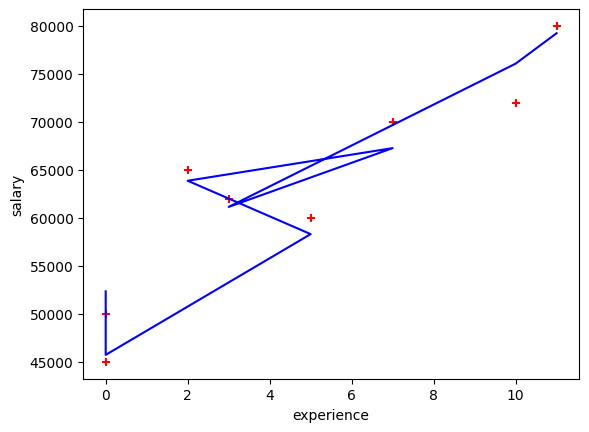

In [30]:
%matplotlib inline
plt.xlabel('experience')
plt.ylabel('salary')
plt.scatter(df.experience,df['salary($)'],color='red',marker='+')
plt.plot(df.experience,reg.predict(x_train.values),color='blue')